In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [49]:
pay = pd.read_csv('WA_Fn-UseC_-Accounts-Receivable.csv')

In [50]:
pay.head()

,countryCode,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate
0,391,0379-NEVHP,4/6/2013,611365,1/2/2013,2/1/2013,55.94,No,1/15/2013,Paper,13,0
1,406,8976-AMJEO,3/3/2012,7900770,1/26/2013,2/25/2013,61.74,Yes,3/3/2013,Electronic,36,6
2,391,2820-XGXSB,1/26/2012,9231909,7/3/2013,8/2/2013,65.88,No,7/8/2013,Electronic,5,0
3,406,9322-YCTQO,4/6/2012,9888306,2/10/2013,3/12/2013,105.92,No,3/17/2013,Electronic,35,5
4,818,6627-ELFBK,11/26/2012,15752855,10/25/2012,11/24/2012,72.27,Yes,11/28/2012,Paper,34,4


In [51]:
pay.groupby('customerID')['countryCode'].count().sort_values()

customerID
2621-XCLEH    15
0187-ERLSR    16
7245-CKNCN    17
3676-CQAIF    17
4632-QZOKX    17
              ..
9286-VLKMI    34
0688-XNJRO    34
4640-FGEJI    35
8887-NCUZC    35
9149-MATVB    36
Name: countryCode, Length: 100, dtype: int64

In [52]:
pay['PaperlessDate'] = pd.to_datetime(pay['PaperlessDate'])
pay['InvoiceDate'] = pd.to_datetime(pay['InvoiceDate'])
pay['DueDate'] = pd.to_datetime(pay['DueDate'])
pay['SettledDate'] = pd.to_datetime(pay['SettledDate'])
pay['countryCode'] = pay['countryCode'].astype(str)
pay['PaymentTerm'] = (pay['DueDate'] - pay['InvoiceDate']).dt.days

In [53]:
pay.head()

,countryCode,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate,PaymentTerm
0,391,0379-NEVHP,2013-04-06,611365,2013-01-02,2013-02-01,55.94,No,2013-01-15,Paper,13,0,30
1,406,8976-AMJEO,2012-03-03,7900770,2013-01-26,2013-02-25,61.74,Yes,2013-03-03,Electronic,36,6,30
2,391,2820-XGXSB,2012-01-26,9231909,2013-07-03,2013-08-02,65.88,No,2013-07-08,Electronic,5,0,30
3,406,9322-YCTQO,2012-04-06,9888306,2013-02-10,2013-03-12,105.92,No,2013-03-17,Electronic,35,5,30
4,818,6627-ELFBK,2012-11-26,15752855,2012-10-25,2012-11-24,72.27,Yes,2012-11-28,Paper,34,4,30


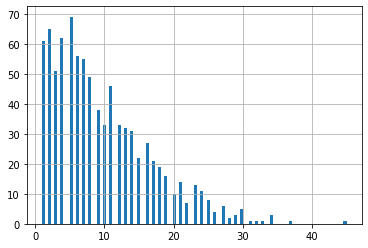

In [54]:
pay[pay['DaysLate']>0]['DaysLate'].hist(bins=100)

In [9]:
pay.loc[pay['DaysLate']==0,'DaysLate_Code'] = 'on time'
pay.loc[pay['DaysLate']>0,'DaysLate_Code'] = 'Late'

In [10]:
pay.head()

,countryCode,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate,PaymentTerm,DaysLate_Code
0,391,0379-NEVHP,2013-04-06,611365,2013-01-02,2013-02-01,55.94,No,2013-01-15,Paper,13,0,30,on time
1,406,8976-AMJEO,2012-03-03,7900770,2013-01-26,2013-02-25,61.74,Yes,2013-03-03,Electronic,36,6,30,Late
2,391,2820-XGXSB,2012-01-26,9231909,2013-07-03,2013-08-02,65.88,No,2013-07-08,Electronic,5,0,30,on time
3,406,9322-YCTQO,2012-04-06,9888306,2013-02-10,2013-03-12,105.92,No,2013-03-17,Electronic,35,5,30,Late
4,818,6627-ELFBK,2012-11-26,15752855,2012-10-25,2012-11-24,72.27,Yes,2012-11-28,Paper,34,4,30,Late


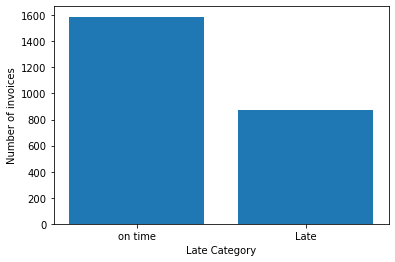

In [11]:
category_count=pay.groupby('DaysLate_Code').count().sort_values(by='customerID', ascending=False)
plt.bar(category_count.index.values, category_count['customerID'])
plt.xlabel('Late Category')
plt.ylabel('Number of invoices')
plt.show()

In [12]:
pay = pay.sort_values(by=['customerID','InvoiceDate'])

In [13]:
pay.head()

,countryCode,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate,PaymentTerm,DaysLate_Code
991,391,0187-ERLSR,2013-07-31,4037644863,2012-03-29,2012-04-28,62.68,Yes,2012-04-25,Paper,27,0,30,on time
2345,391,0187-ERLSR,2013-07-31,9471530987,2012-05-15,2012-06-14,77.19,No,2012-05-28,Paper,13,0,30,on time
2401,391,0187-ERLSR,2013-07-31,9744145268,2012-05-21,2012-06-20,51.65,No,2012-06-04,Paper,14,0,30,on time
1791,391,0187-ERLSR,2013-07-31,7214076449,2012-06-16,2012-07-16,64.47,Yes,2012-07-04,Paper,18,0,30,on time
445,391,0187-ERLSR,2013-07-31,1756742390,2012-09-05,2012-10-05,84.57,No,2012-09-14,Paper,9,0,30,on time


In [14]:
pay = pay.drop(['PaperlessDate','invoiceNumber'],axis=1)

In [15]:
pay.head()

,countryCode,customerID,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate,PaymentTerm,DaysLate_Code
991,391,0187-ERLSR,2012-03-29,2012-04-28,62.68,Yes,2012-04-25,Paper,27,0,30,on time
2345,391,0187-ERLSR,2012-05-15,2012-06-14,77.19,No,2012-05-28,Paper,13,0,30,on time
2401,391,0187-ERLSR,2012-05-21,2012-06-20,51.65,No,2012-06-04,Paper,14,0,30,on time
1791,391,0187-ERLSR,2012-06-16,2012-07-16,64.47,Yes,2012-07-04,Paper,18,0,30,on time
445,391,0187-ERLSR,2012-09-05,2012-10-05,84.57,No,2012-09-14,Paper,9,0,30,on time


In [16]:
pay['late_invoices'] = np.where(pay['DaysLate'] > 0,1,0)
pay['late_invoice_Amt'] = np.where(pay['DaysLate'] > 0,pay['InvoiceAmount'],0)

In [17]:
import pandasql as ps

In [18]:
sqlcode = '''select *,sum(InvoiceAmount) over(partition by customerID order by InvoiceDate ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING) as total_invoice_amt,
sum(late_invoice_Amt) over(partition by customerID order by InvoiceDate ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING) as total_late_invoice_amt,
sum(late_invoices) over(partition by customerID order by InvoiceDate ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING) as total_late_invoices,
count() over(partition by customerID order by InvoiceDate ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING) as total_invoices
from pay'''

pay2 = ps.sqldf(sqlcode, locals())

In [19]:
pay2.head()

,countryCode,customerID,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate,PaymentTerm,DaysLate_Code,late_invoices,late_invoice_Amt,total_invoice_amt,total_late_invoice_amt,total_late_invoices,total_invoices
0,391,0187-ERLSR,2012-03-29 00:00:00.000000,2012-04-28 00:00:00.000000,62.68,Yes,2012-04-25 00:00:00.000000,Paper,27,0,30,on time,0,0.0,NaN,NaN,NaN,0
1,391,0187-ERLSR,2012-05-15 00:00:00.000000,2012-06-14 00:00:00.000000,77.19,No,2012-05-28 00:00:00.000000,Paper,13,0,30,on time,0,0.0,62.68,0.0,0.0,1
2,391,0187-ERLSR,2012-05-21 00:00:00.000000,2012-06-20 00:00:00.000000,51.65,No,2012-06-04 00:00:00.000000,Paper,14,0,30,on time,0,0.0,139.87,0.0,0.0,2
3,391,0187-ERLSR,2012-06-16 00:00:00.000000,2012-07-16 00:00:00.000000,64.47,Yes,2012-07-04 00:00:00.000000,Paper,18,0,30,on time,0,0.0,191.52,0.0,0.0,3
4,391,0187-ERLSR,2012-09-05 00:00:00.000000,2012-10-05 00:00:00.000000,84.57,No,2012-09-14 00:00:00.000000,Paper,9,0,30,on time,0,0.0,255.99,0.0,0.0,4


In [20]:
pay2['late_invoice_amt_pct'] = pay2['total_late_invoice_amt']/pay2['total_invoice_amt']
pay2['late_invoices_pct'] = pay2['total_late_invoices']/pay2['total_invoices']

In [21]:
pay2 = pay2.replace(np.NaN,0)

In [22]:
pay2.head()

,countryCode,customerID,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate,PaymentTerm,DaysLate_Code,late_invoices,late_invoice_Amt,total_invoice_amt,total_late_invoice_amt,total_late_invoices,total_invoices,late_invoice_amt_pct,late_invoices_pct
0,391,0187-ERLSR,2012-03-29 00:00:00.000000,2012-04-28 00:00:00.000000,62.68,Yes,2012-04-25 00:00:00.000000,Paper,27,0,30,on time,0,0.0,0.00,0.0,0.0,0,0.0,0.0
1,391,0187-ERLSR,2012-05-15 00:00:00.000000,2012-06-14 00:00:00.000000,77.19,No,2012-05-28 00:00:00.000000,Paper,13,0,30,on time,0,0.0,62.68,0.0,0.0,1,0.0,0.0
2,391,0187-ERLSR,2012-05-21 00:00:00.000000,2012-06-20 00:00:00.000000,51.65,No,2012-06-04 00:00:00.000000,Paper,14,0,30,on time,0,0.0,139.87,0.0,0.0,2,0.0,0.0
3,391,0187-ERLSR,2012-06-16 00:00:00.000000,2012-07-16 00:00:00.000000,64.47,Yes,2012-07-04 00:00:00.000000,Paper,18,0,30,on time,0,0.0,191.52,0.0,0.0,3,0.0,0.0
4,391,0187-ERLSR,2012-09-05 00:00:00.000000,2012-10-05 00:00:00.000000,84.57,No,2012-09-14 00:00:00.000000,Paper,9,0,30,on time,0,0.0,255.99,0.0,0.0,4,0.0,0.0


In [23]:
pay = pay2.drop(['countryCode','customerID','InvoiceDate','DueDate','SettledDate','DaysToSettle','DaysLate'],axis=1)

In [24]:
pay_x = pay.drop('DaysLate_Code',axis=1)
pay_y = pay[['DaysLate_Code']]

In [25]:
pay_x['Disputed'].value_counts()

No     1905
Yes     561
Name: Disputed, dtype: int64

In [26]:
pay_x['Disputed'] = np.where(pay_x['Disputed']=='Yes',1,0)

In [27]:
pay_x['PaperlessBill'].value_counts()

Paper         1263
Electronic    1203
Name: PaperlessBill, dtype: int64

In [28]:
pay_x['PaperlessBill'] = np.where(pay_x['PaperlessBill']=='Electronic',1,0)

In [29]:
pay_y['Late_Code'] = np.where(pay_y['DaysLate_Code'] == 'Late',1,0)

In [30]:
import scipy.misc

In [95]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report, confusion_matrix,precision_recall_fscore_support,accuracy_score

In [33]:
X_train, X_test,Y_train,Y_test = train_test_split(pay_x,pay_y[['Late_Code']],test_size=0.2,random_state=42)

target_names = ['on time', 'Late']

n_classes = Y_train.shape[1]

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Logistic Regression

In [37]:
param_grid = [{'C': [0.1,0.2,0.5,1,5,10],'penalty': ['l1', 'l2']}]

model = LogisticRegression()

model2 = GridSearchCV(model, param_grid,cv=5, n_jobs=-1,scoring='precision')
model2.fit(X_train_scaled,Y_train)
print(model2.best_params_)
print(model2.best_score_)

{'C': 0.1, 'penalty': 'l1'}
1.0


In [38]:
clf = LogisticRegression(C=0.1,
                             penalty='l1',
                             random_state=42)
clf.fit(X_train_scaled, Y_train)

y_score = clf.predict_proba(X_test_scaled)

In [39]:
y_pred = clf.fit(X_train_scaled, Y_train).predict(X_test_scaled)
Logit_test = metrics.average_precision_score(Y_test, y_pred)
print("Logistic test score:",Logit_test)

Logistic test score: 1.0


In [70]:
print(classification_report(Y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     on time       1.00      1.00      1.00       322
        Late       1.00      1.00      1.00       172

    accuracy                           1.00       494
   macro avg       1.00      1.00      1.00       494
weighted avg       1.00      1.00      1.00       494



In [40]:
import scikitplot as skplt

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       322
           1       1.00      1.00      1.00       172

    accuracy                           1.00       494
   macro avg       1.00      1.00      1.00       494
weighted avg       1.00      1.00      1.00       494

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F score: 1.0


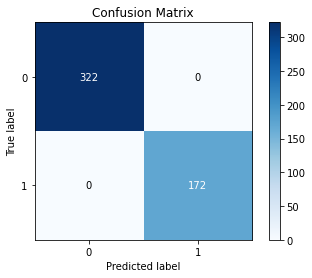

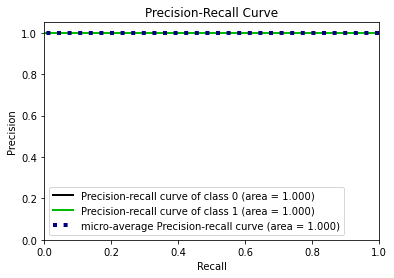

In [45]:
conf_mat = confusion_matrix(Y_test, y_pred)
accuracy = accuracy_score(Y_test, y_pred)
score = precision_recall_fscore_support(Y_test, y_pred, average='weighted')
precision, recall, fscore, k = score
skplt.metrics.plot_confusion_matrix(Y_test, y_pred)
skplt.metrics.plot_precision_recall_curve(Y_test, y_score)
print(classification_report(Y_test, y_pred))
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F score:",fscore)

For the basic prediction of whenther an invoice will be late vs early, the logictic regression is able to give perfect predictions. 

But some times just know whether an invoice is going to be late is not enough Business wants to know more about how much delay can be expected so they can prioritize invoices that needs to be followed up early.

Hence taking the analysis a bit further by dividing the late class into 2 sub classes less than 10 days late and more than 10 days late based on the distribution's median value

In [57]:
pay = pd.read_csv('WA_Fn-UseC_-Accounts-Receivable.csv')

In [58]:
pay['PaperlessDate'] = pd.to_datetime(pay['PaperlessDate'])
pay['InvoiceDate'] = pd.to_datetime(pay['InvoiceDate'])
pay['DueDate'] = pd.to_datetime(pay['DueDate'])
pay['SettledDate'] = pd.to_datetime(pay['SettledDate'])
pay['countryCode'] = pay['countryCode'].astype(str)
pay['PaymentTerm'] = (pay['DueDate'] - pay['InvoiceDate']).dt.days

In [59]:
pay.loc[pay['DaysLate']==0,'DaysLate_Code'] = 'on time'
pay.loc[(pay['DaysLate']>0) & (pay['DaysLate']<11),'DaysLate_Code'] = 'Late by less than 10 days'
pay.loc[pay['DaysLate']>10,'DaysLate_Code'] = 'Late by more than 10 days'

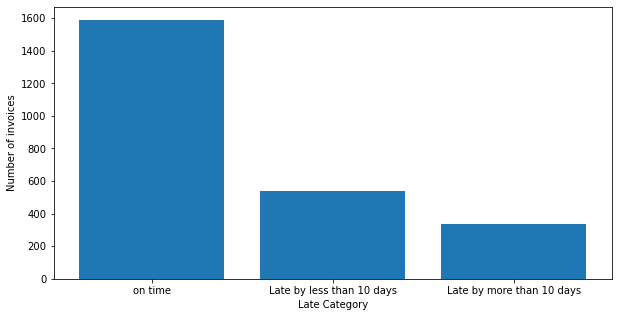

In [62]:
category_count=pay.groupby('DaysLate_Code').count().sort_values(by='customerID', ascending=False)
fig = plt.subplots(figsize=(10,5))
plt.bar(category_count.index.values, category_count['customerID'])
plt.xlabel('Late Category')
plt.ylabel('Number of invoices')
plt.show()

In [63]:
pay = pay.sort_values(by=['customerID','InvoiceDate'])

In [64]:
pay = pay.drop(['PaperlessDate','invoiceNumber'],axis=1)

In [65]:
pay['late_invoices'] = np.where(pay['DaysLate'] > 0,1,0)
pay['late_invoice_Amt'] = np.where(pay['DaysLate'] > 0,pay['InvoiceAmount'],0)

In [66]:
import pandasql as ps

In [67]:
sqlcode = '''select *,sum(InvoiceAmount) over(partition by customerID order by InvoiceDate ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING) as total_invoice_amt,
sum(late_invoice_Amt) over(partition by customerID order by InvoiceDate ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING) as total_late_invoice_amt,
sum(late_invoices) over(partition by customerID order by InvoiceDate ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING) as total_late_invoices,
count() over(partition by customerID order by InvoiceDate ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING) as total_invoices
from pay'''

pay2 = ps.sqldf(sqlcode, locals())

In [68]:
pay2['late_invoice_amt_pct'] = pay2['total_late_invoice_amt']/pay2['total_invoice_amt']
pay2['late_invoices_pct'] = pay2['total_late_invoices']/pay2['total_invoices']

In [69]:
pay2 = pay2.replace(np.NaN,0)

In [70]:
pay = pay2.drop(['countryCode','customerID','InvoiceDate','DueDate','SettledDate','DaysToSettle','DaysLate'],axis=1)

In [86]:
pay_x = pay.drop('DaysLate_Code',axis=1)
pay_y = pay[['DaysLate_Code']]

In [87]:
pay_x['Disputed'] = np.where(pay_x['Disputed']=='Yes',1,0)

In [88]:
pay_x['PaperlessBill'] = np.where(pay_x['PaperlessBill']=='Electronic',1,0)

In [89]:
pay_y.loc[pay_y['DaysLate_Code'] == 'on time','Late_Code'] = 0
pay_y.loc[pay_y['DaysLate_Code'] == 'Late by less than 10 days','Late_Code'] = 1
pay_y.loc[pay_y['DaysLate_Code'] == 'Late by more than 10 days','Late_Code'] = 2

In [90]:
X_train, X_test,Y_train,Y_test = train_test_split(pay_x,pay_y[['Late_Code']],test_size=0.2,random_state=42)

target_names = ['on time', 'Late by less than 10 days', 'Late by more than 10 days']

n_classes = Y_train.shape[1]

In [91]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [92]:
scorer = sklearn.metrics.make_scorer(sklearn.metrics.precision_score, average = 'weighted')

### Logistic Regression

In [120]:
param_grid = [{'C': [0.1,0.2,0.5,1,5,10],'penalty': ['l1', 'l2']}]

l_clf = LogisticRegression()

model2 = GridSearchCV(l_clf, param_grid,cv=5, n_jobs=-1,scoring=scorer)
model2.fit(X_train_scaled,Y_train)
print(model2.best_params_)
print(model2.best_score_)

{'C': 0.5, 'penalty': 'l2'}
0.9035570973565055


In [121]:
l_clf = LogisticRegression(C=0.1,penalty='l1',random_state=42)
l_clf.fit(X_train_scaled, Y_train)

y_score = l_clf.predict_proba(X_test_scaled)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       322
         1.0       0.73      0.86      0.79       111
         2.0       0.62      0.43      0.50        61

    accuracy                           0.90       494
   macro avg       0.78      0.76      0.76       494
weighted avg       0.89      0.90      0.89       494

Accuracy: 0.8967611336032388
Precision: 0.892464148537023
Recall: 0.8967611336032388
F score: 0.8913086841069591


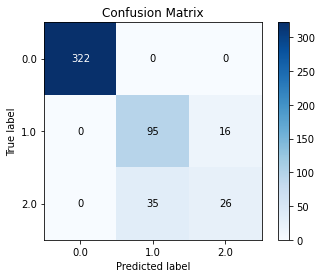

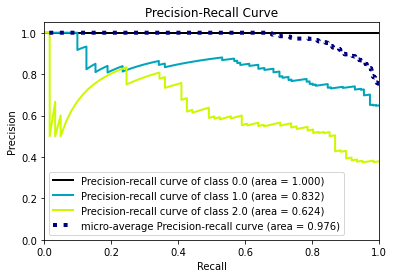

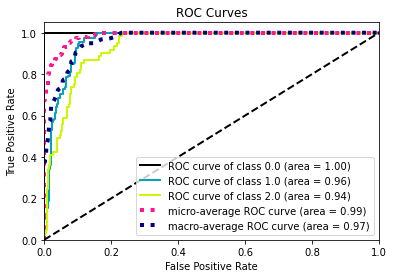

In [122]:
y_pred = l_clf.predict(X_test_scaled)
conf_mat = confusion_matrix(Y_test, y_pred)
accuracy = accuracy_score(Y_test, y_pred)
score = precision_recall_fscore_support(Y_test, y_pred, average='weighted')
precision, recall, fscore, k = score
skplt.metrics.plot_confusion_matrix(Y_test, y_pred)
skplt.metrics.plot_precision_recall_curve(Y_test, y_score)
skplt.metrics.plot_roc_curve(Y_test, y_score)
print(classification_report(Y_test, y_pred))
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F score:",fscore)

### KNN Classifier

In [93]:
from sklearn import neighbors
param_grid_k = [{'n_neighbors': range(1,100),'weights': ["uniform", "distance"]}]

knn_clfs = neighbors.KNeighborsClassifier()
grid_search1 = GridSearchCV(knn_clfs, param_grid_k, cv=5, n_jobs=-1,scoring=scorer)
grid_search1.fit(X_train_scaled, Y_train)
print(grid_search1.best_params_)
print(grid_search1.best_score_)

{'n_neighbors': 36, 'weights': 'uniform'}
0.8978466934046783


In [96]:
clf = OneVsRestClassifier(neighbors.KNeighborsClassifier(n_neighbors=36,weights='distance'))
clf.fit(X_train_scaled, Y_train)

y_score = clf.predict_proba(X_test_scaled)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       322
         1.0       0.74      0.86      0.80       111
         2.0       0.65      0.46      0.54        61

    accuracy                           0.90       494
   macro avg       0.80      0.77      0.78       494
weighted avg       0.90      0.90      0.90       494

Accuracy: 0.902834008097166
Precision: 0.8994444967517182
Recall: 0.902834008097166
F score: 0.8980691373403925


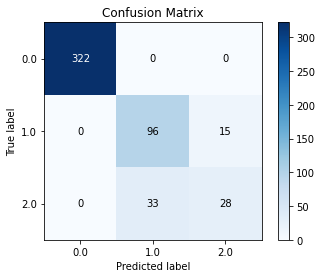

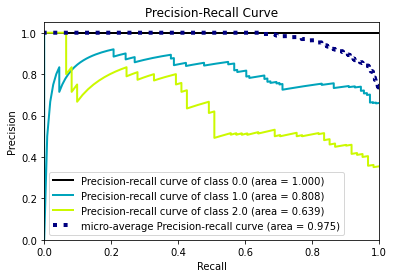

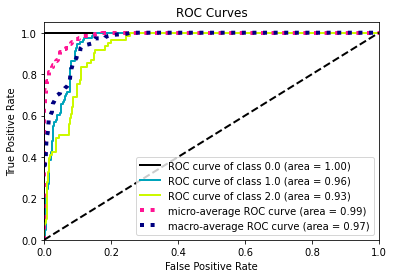

In [102]:
y_pred = clf.fit(X_train_scaled, Y_train).predict(X_test_scaled)
conf_mat = confusion_matrix(Y_test, y_pred)
accuracy = accuracy_score(Y_test, y_pred)
score = precision_recall_fscore_support(Y_test, y_pred, average='weighted')
precision, recall, fscore, k = score
skplt.metrics.plot_confusion_matrix(Y_test, y_pred)
skplt.metrics.plot_precision_recall_curve(Y_test, y_score)
skplt.metrics.plot_roc_curve(Y_test, y_score)
print(classification_report(Y_test, y_pred))
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F score:",fscore)

### Decision Trees

In [103]:
# Tree Regression
from sklearn import tree

param_grid_t = [{'max_depth': range(1,20), 'min_samples_split': range(2,20)}]

tree_clf = tree.DecisionTreeClassifier()
grid_search1 = GridSearchCV(tree_clf, param_grid_t, cv=5, n_jobs=-1,scoring=scorer)
grid_search1.fit(X_train, Y_train)
print(grid_search1.best_params_)
print(grid_search1.best_score_)

{'max_depth': 3, 'min_samples_split': 2}
0.9016420691205357


In [105]:
d_clf = OneVsRestClassifier(tree.DecisionTreeClassifier(max_depth=3,min_samples_split=2))
d_clf.fit(X_train, Y_train)

y_score = d_clf.predict_proba(X_test)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       322
         1.0       0.74      0.88      0.80       111
         2.0       0.67      0.43      0.52        61

    accuracy                           0.90       494
   macro avg       0.80      0.77      0.77       494
weighted avg       0.90      0.90      0.90       494

Accuracy: 0.902834008097166
Precision: 0.899708786135379
Recall: 0.902834008097166
F score: 0.8965261830490476


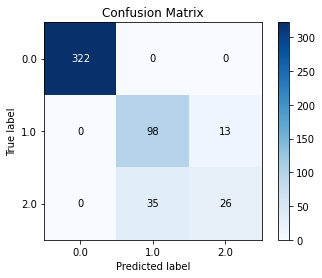

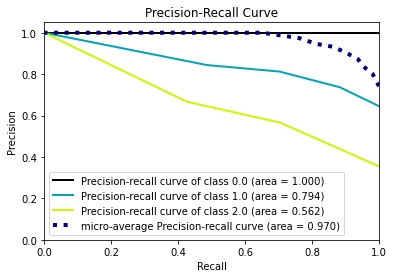

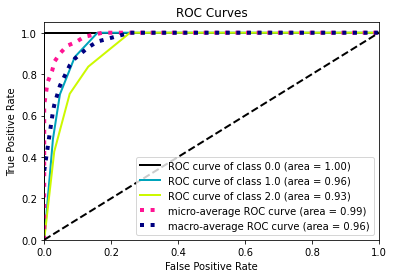

In [106]:
y_pred = d_clf.predict(X_test)
conf_mat = confusion_matrix(Y_test, y_pred)
accuracy = accuracy_score(Y_test, y_pred)
score = precision_recall_fscore_support(Y_test, y_pred, average='weighted')
precision, recall, fscore, k = score
skplt.metrics.plot_confusion_matrix(Y_test, y_pred)
skplt.metrics.plot_precision_recall_curve(Y_test, y_score)
skplt.metrics.plot_roc_curve(Y_test, y_score)
print(classification_report(Y_test, y_pred))
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F score:",fscore)

### SVM Classifier

In [107]:
from sklearn import svm
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1,1e-3,1e-4,1e-5],'C': [1, 10, 100, 1000,10000]},
                    {'kernel': ['linear'], 'C': [0.1, 1, 10, 100]},
                    {'kernel': ['poly'], 'degree': [1,2,3],'C': [1, 10, 100, 1000,10000]}]

for i,p in enumerate(tuned_parameters):
    clf = GridSearchCV(svm.SVC(), p, cv=5,scoring=scorer)
    clf.fit(X_train_scaled, Y_train)
    print(clf.best_params_)
    print(clf.best_score_)

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.9009581741804087
{'C': 1, 'kernel': 'linear'}
0.8953933637083139
{'C': 1, 'degree': 3, 'kernel': 'poly'}
0.9006576180562305


In [110]:
rbf_clf = OneVsRestClassifier(svm.SVC(C=1000,gamma=0.001,kernel='rbf',probability=True))
rbf_clf.fit(X_train_scaled, Y_train)

y_score = rbf_clf.predict_proba(X_test_scaled)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       322
         1.0       0.73      0.83      0.78       111
         2.0       0.59      0.44      0.50        61

    accuracy                           0.89       494
   macro avg       0.77      0.76      0.76       494
weighted avg       0.89      0.89      0.89       494

Accuracy: 0.8927125506072875
Precision: 0.8883643054123602
Recall: 0.8927125506072875
F score: 0.8885875747345048


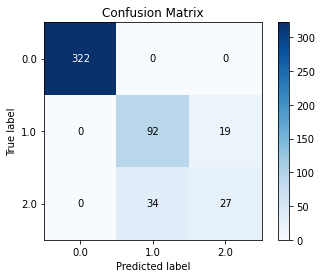

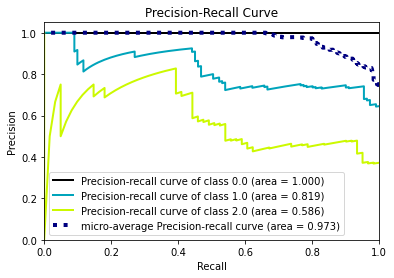

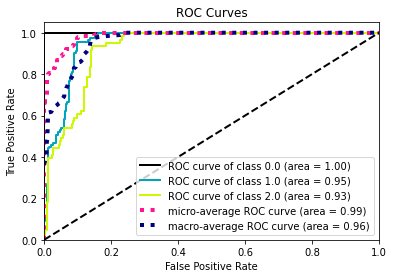

In [111]:
y_pred = rbf_clf.predict(X_test_scaled)
conf_mat = confusion_matrix(Y_test, y_pred)
accuracy = accuracy_score(Y_test, y_pred)
score = precision_recall_fscore_support(Y_test, y_pred, average='weighted')
precision, recall, fscore, k = score
skplt.metrics.plot_confusion_matrix(Y_test, y_pred)
skplt.metrics.plot_precision_recall_curve(Y_test, y_score)
skplt.metrics.plot_roc_curve(Y_test, y_score)
print(classification_report(Y_test, y_pred))
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F score:",fscore)

In [113]:
lin_clf = OneVsRestClassifier(svm.SVC(C=1,kernel='linear',probability=True))
lin_clf.fit(X_train_scaled, Y_train)

y_score = lin_clf.predict_proba(X_test_scaled)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       322
         1.0       0.73      0.87      0.80       111
         2.0       0.65      0.43      0.51        61

    accuracy                           0.90       494
   macro avg       0.79      0.77      0.77       494
weighted avg       0.90      0.90      0.89       494

Accuracy: 0.9008097165991903
Precision: 0.8972027972027972
Recall: 0.9008097165991903
F score: 0.8947838553535966


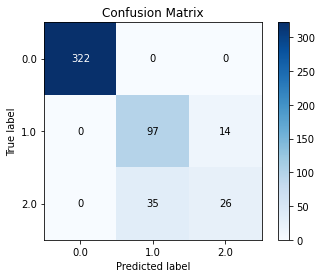

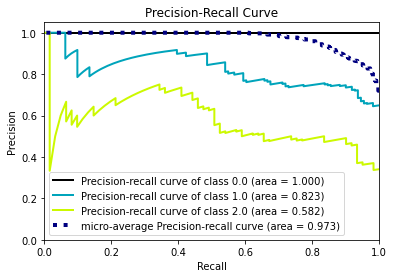

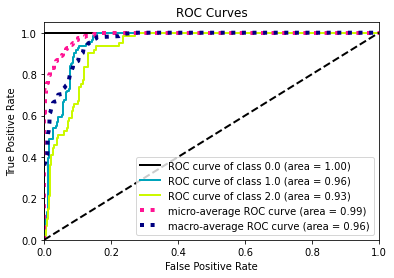

In [114]:
y_pred = clf.predict(X_test_scaled)
conf_mat = confusion_matrix(Y_test, y_pred)
accuracy = accuracy_score(Y_test, y_pred)
score = precision_recall_fscore_support(Y_test, y_pred, average='weighted')
precision, recall, fscore, k = score
skplt.metrics.plot_confusion_matrix(Y_test, y_pred)
skplt.metrics.plot_precision_recall_curve(Y_test, y_score)
skplt.metrics.plot_roc_curve(Y_test, y_score)
print(classification_report(Y_test, y_pred))
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F score:",fscore)

In [115]:
poly_clf = OneVsRestClassifier(svm.SVC(C=1,degree=3,kernel='poly',probability=True))
poly_clf.fit(X_train_scaled, Y_train)

y_score = poly_clf.predict_proba(X_test_scaled)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       322
         1.0       0.73      0.87      0.80       111
         2.0       0.65      0.43      0.51        61

    accuracy                           0.90       494
   macro avg       0.79      0.77      0.77       494
weighted avg       0.90      0.90      0.89       494

Accuracy: 0.9008097165991903
Precision: 0.8972027972027972
Recall: 0.9008097165991903
F score: 0.8947838553535966


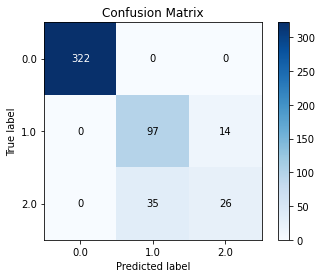

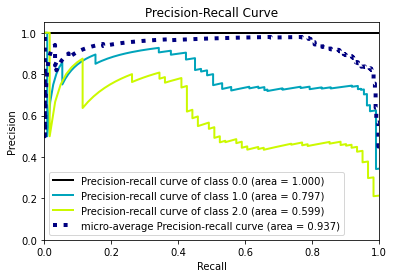

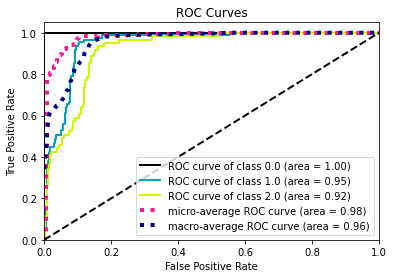

In [116]:
y_pred = poly_clf.predict(X_test_scaled)
conf_mat = confusion_matrix(Y_test, y_pred)
accuracy = accuracy_score(Y_test, y_pred)
score = precision_recall_fscore_support(Y_test, y_pred, average='weighted')
precision, recall, fscore, k = score
skplt.metrics.plot_confusion_matrix(Y_test, y_pred)
skplt.metrics.plot_precision_recall_curve(Y_test, y_score)
skplt.metrics.plot_roc_curve(Y_test, y_score)
print(classification_report(Y_test, y_pred))
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F score:",fscore)

### XGBoost

In [117]:
from xgboost import XGBClassifier
params = {'n_estimators':[250,500,750],'learning_rate':[0.001,0.01,0.1],'max_depth':[1,2,3,4,5,6]}

xgb2 = XGBClassifier(objective='multi:softmax',random_state=42)
clf = GridSearchCV(xgb2,params,cv=3,scoring=scorer)
clf.fit(X_train, Y_train)

print(clf.best_params_)
print(clf.best_score_)

{'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 250}
0.9005465597751735


In [123]:
xgb_clf = OneVsRestClassifier(XGBClassifier(learning_rate=0.001,max_depth=3,n_estimators=250))
xgb_clf.fit(X_train, Y_train)

y_score = xgb_clf.predict_proba(X_test)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       322
         1.0       0.74      0.88      0.80       111
         2.0       0.67      0.43      0.52        61

    accuracy                           0.90       494
   macro avg       0.80      0.77      0.77       494
weighted avg       0.90      0.90      0.90       494

Accuracy: 0.902834008097166
Precision: 0.899708786135379
Recall: 0.902834008097166
F score: 0.8965261830490476


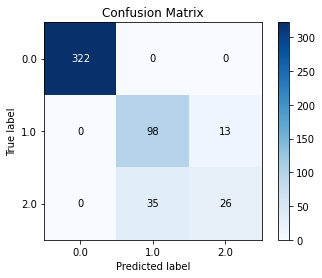

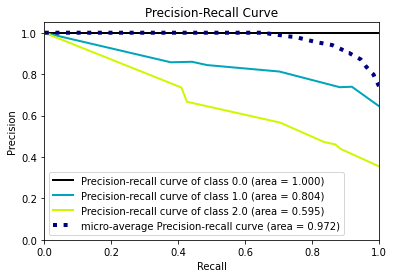

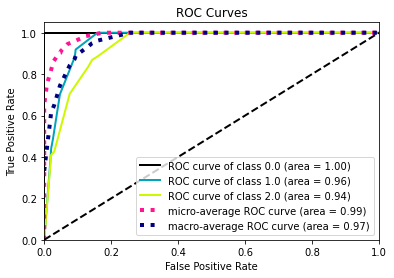

In [124]:
y_pred = xgb_clf.predict(X_test)
conf_mat = confusion_matrix(Y_test, y_pred)
accuracy = accuracy_score(Y_test, y_pred)
score = precision_recall_fscore_support(Y_test, y_pred, average='weighted')
precision, recall, fscore, k = score
skplt.metrics.plot_confusion_matrix(Y_test, y_pred)
skplt.metrics.plot_precision_recall_curve(Y_test, y_score)
skplt.metrics.plot_roc_curve(Y_test, y_score)
print(classification_report(Y_test, y_pred))
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F score:",fscore)

### Conclusion

Looking at the performance from all the models, all models are doing a perfectly good job at predicting the on time payments invoices which is a good sign as we do not have to go after these invoices which can create a bad impression for our client and also waste valuable humna capital on something that will be paid on time.

From the other 2 late classes, the preformance has been comparable as everything is close, but XGBoost and decision trees are leading with a minor advantage and given that decision tree being a more simpler model i would go with that.